In [43]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io
from io import StringIO

In [44]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [20]:
def diamond(n):
    for i in range(n):
        print(" "*(n-i)+"*"*(2*i+1))
    for j in range(n,-1,-1):
        print(" "*(n-j)+"*"*(2*j+1))

In [21]:
diamond(5)

     *
    ***
   *****
  *******
 *********
***********
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [ ]:
#讀取資料的方法但是發現set_01會跑出set()
f= open('symbols01.txt')
symbols01=f.readline()
while symbols01:
    print(symbols01,end="")
    symbols01=f.readline()

set_01=set(symbols01)

In [ ]:
#用readlines讀取資料發現set_02跑出set()
f= open('symbols02.txt')
symbols02=f.readlines()
for line in symbols02:
    print(line,end="")

    set_02=set(symbols02)

In [ ]:
#發現取union跑出\n
set_01|set_02

In [17]:
#新方法抓資料去除\n https://stackoverflow.com/questions/15233340/getting-rid-of-n-when-using-readlines
with open('symbols01.txt') as f:
    symbols_01 = f.read().splitlines()
          
set_01=set(symbols_01)

In [18]:
with open('symbols02.txt') as f:
    symbols_02 = f.read().splitlines()
          
set_02=set(symbols_02)

In [22]:
set_03=(set_01 | set_02)

In [27]:
set_03

{'ABCD',
 'ABDC',
 'ABUS',
 'ACFC',
 'ACMR',
 'ACRX',
 'ACSF',
 'ADAP',
 'ADES',
 'ADMA',
 'ADMP',
 'ADRE',
 'ADRO',
 'ADVM',
 'ADXS',
 'AGFS',
 'AGRX',
 'AHPA',
 'AINV',
 'AIRG',
 'AIRR',
 'AKTS',
 'AKTX',
 'ALDX',
 'ALJJ',
 'ALLT',
 'ALPN',
 'ALRN',
 'ALSK',
 'AMBCW',
 'AMD',
 'AMRS',
 'APOP',
 'APPS',
 'ARCT',
 'ARDX',
 'ARQL',
 'ASCMA',
 'ASFI',
 'ASNS',
 'ASPU',
 'ASUR',
 'ASV',
 'ASYS',
 'ATAC',
 'ATAI',
 'ATAX',
 'ATTU',
 'AUBN',
 'AUDC',
 'AUTO',
 'AVDL',
 'AVID',
 'AVXL',
 'AXON',
 'AXSM',
 'AXTI',
 'BANX',
 'BCAC',
 'BCOV',
 'BDSI',
 'BEBE',
 'BGFV',
 'BKCC',
 'BKEP',
 'BKEPP',
 'BLCM',
 'BLFS',
 'BLPH',
 'BLVD',
 'BOCH',
 'BOXL',
 'BRAC',
 'BRID',
 'BRPA',
 'BRQS',
 'BV',
 'BVXV',
 'BYBK',
 'CAAS',
 'CALL',
 'CAMT',
 'CART',
 'CBAN',
 'CBAY',
 'CBFV',
 'CBIO',
 'CBMG',
 'CCLP',
 'CCUR',
 'CCXI',
 'CDNA',
 'CDOR',
 'CDTX',
 'CDXC',
 'CDXS',
 'CECE',
 'CELC',
 'CELH',
 'CEMI',
 'CETXP',
 'CFMS',
 'CGEN',
 'CGNT',
 'CGO',
 'CHRS',
 'CHW',
 'CIZN',
 'CKPT',
 'CLAR',
 'CLFD',
 'C

In [23]:
#將set_03轉成其他list容器型態
symbols_03=list(set_03).

In [33]:
symbols_03.sort()
print(symbols_03)

['ABCD', 'ABDC', 'ABUS', 'ACFC', 'ACMR', 'ACRX', 'ACSF', 'ADAP', 'ADES', 'ADMA', 'ADMP', 'ADRE', 'ADRO', 'ADVM', 'ADXS', 'AGFS', 'AGRX', 'AHPA', 'AINV', 'AIRG', 'AIRR', 'AKTS', 'AKTX', 'ALDX', 'ALJJ', 'ALLT', 'ALPN', 'ALRN', 'ALSK', 'AMBCW', 'AMD', 'AMRS', 'APOP', 'APPS', 'ARCT', 'ARDX', 'ARQL', 'ASCMA', 'ASFI', 'ASNS', 'ASPU', 'ASUR', 'ASV', 'ASYS', 'ATAC', 'ATAI', 'ATAX', 'ATTU', 'AUBN', 'AUDC', 'AUTO', 'AVDL', 'AVID', 'AVXL', 'AXON', 'AXSM', 'AXTI', 'BANX', 'BCAC', 'BCOV', 'BDSI', 'BEBE', 'BGFV', 'BKCC', 'BKEP', 'BKEPP', 'BLCM', 'BLFS', 'BLPH', 'BLVD', 'BOCH', 'BOXL', 'BRAC', 'BRID', 'BRPA', 'BRQS', 'BV', 'BVXV', 'BYBK', 'CAAS', 'CALL', 'CAMT', 'CART', 'CBAN', 'CBAY', 'CBFV', 'CBIO', 'CBMG', 'CCLP', 'CCUR', 'CCXI', 'CDNA', 'CDOR', 'CDTX', 'CDXC', 'CDXS', 'CECE', 'CELC', 'CELH', 'CEMI', 'CETXP', 'CFMS', 'CGEN', 'CGNT', 'CGO', 'CHRS', 'CHW', 'CIZN', 'CKPT', 'CLAR', 'CLFD', 'CLMT', 'CLNT', 'CLRO', 'CLSD', 'CLUB', 'CMFN', 'CMSS', 'CMSSU', 'CNAC', 'CNACU', 'CNAT', 'CNFR', 'CNTY', 'CODA',

In [37]:
#將 symbols_03輸出成文字檔
with open('symbols_03.txt','w') as f:
    for symbol in symbols_03:
        f.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [5]:
r=requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [6]:
r.encoding="big5"

In [7]:
companylist=r.text.split("\r\n")

In [45]:
companylist=pd.read_csv(StringIO(r.text),skiprows=1)

In [46]:
companylist.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [22]:
data.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'RICK', 'UTMD', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'VRA', 'NEWT', 'AAPL', 'DFRG'])

In [25]:
df = data['TWIN']

In [8]:
df['L14'] = df['Low'].rolling(window=14).min()
df['H14'] = df['High'].rolling(window=14).max()
df['%K'] = 100*((df['Close'] - df['L14']) / (df['H14'] - df['L14']) )
df['%D'] = df['%K'].rolling(window=3).mean()

In [58]:
#因為talib.abstract.STOCH(df)這個函式(high,low,close)為特定格式
df.columns = ['open', 'high', 'low','close','adj close','volume']

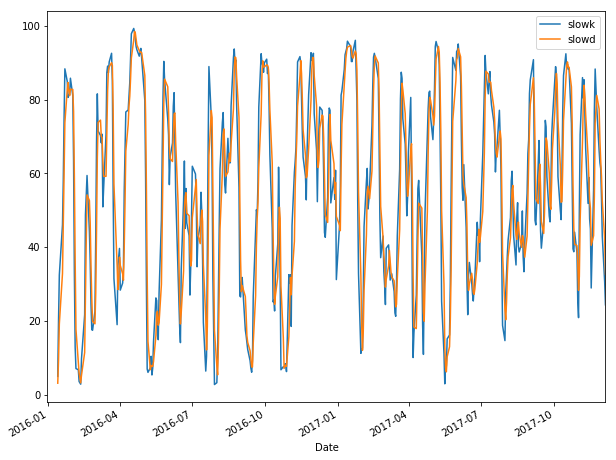

In [59]:
#計算出KD值 https://koreal6803.github.io/Python-%E7%B0%A1%E5%96%AE158%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E8%A8%88%E7%AE%97/
talib.abstract.STOCH(df).plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [67]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [68]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [69]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [70]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [71]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [86]:
# 定義你的策略計算KD值
#%K>%D 且當%K>20大於20時進場
#%D>%K 且當%K>70大於70時退場

def M064030029_strategy(df):
    df['L14'] = df['Low'].rolling(window=14).min()
    df['H14'] = df['High'].rolling(window=14).max()
    df['%K'] = 100*((df['Close'] - df['L14']) / (df['H14'] - df['L14']) )
    df['%D'] = df['%K'].rolling(window=3).mean()
 
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['%K'][t] < df['%D'][t-1] and df['%K'][t]>20:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['%D'][t] > df['%K'][t-1] and df['%K'][t]>70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [93]:
M064030029_strategy(df)

,Open,High,Low,Close,Adj Close,Volume,L14,H14,%K,%D,signals,RSI,positions
Date,,,,,,,,,,,,,
2015-12-31,10.740000,11.000000,10.520000,10.520000,10.520000,36900,NaN,NaN,NaN,NaN,0,NaN,NaN
2016-01-04,10.220000,10.470000,10.110000,10.410000,10.410000,44600,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-05,10.380000,10.450000,10.280000,10.340000,10.340000,27700,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-06,10.300000,10.360000,9.930000,9.960000,9.960000,51200,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-07,9.780000,9.830000,9.510000,9.560000,9.560000,82000,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-08,9.570000,9.620000,9.300000,9.310000,9.310000,31600,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-11,9.400000,9.470000,9.000000,9.000000,9.000000,48100,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-12,9.090000,9.520000,8.700000,8.840000,8.840000,67200,NaN,NaN,NaN,NaN,0,NaN,0.0
2016-01-13,8.910000,9.390000,8.630000,8.710000,8.710000,60800,NaN,NaN,NaN,NaN,0,NaN,0.0


In [87]:
def apply_strategy(strategy, df):
    return strategy(df)

In [88]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [89]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [90]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [91]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
13,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
56,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
50,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
27,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [92]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
7,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
11,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
59,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
68,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
